In [1]:
dir = 'data/full data/'

import os
import xml.etree.ElementTree as ET

#print all the files in the directory
excluded_files = []
for file_name in os.listdir(dir):
    try:
        tree = ET.parse(dir + file_name)
    except:
        excluded_files.append(file_name)
        print(file_name)
        continue
    

t1961-6-germany-togo-bit-1961.xml
t1963-6-germany-tunisia-bit-1963.xml
t1993-71-germany-slovenia-bit-1993.xml


check if all the documents' metadata are in the same format

In [2]:
file1 = 'data/full data/t1990-14-canada-czech-republic-bit-1990.xml'
root = ET.parse(file1).getroot()
meta_data = root[0]
meta_data_children_template = set(child.tag for child in meta_data.getchildren())


C:\Users\Xiang\AppData\Local\Temp\ipykernel_32536\4210734556.py:4: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  meta_data_children_template = set(child.tag for child in meta_data.getchildren())


In [3]:
flag = True
n = 0

for file_name in os.listdir(dir):
    if file_name not in excluded_files:
        n += 1
        tree = ET.parse(dir + file_name)
        root = tree.getroot()
        meta_data = root[0]
        meta_data_children = set(child.tag for child in meta_data.getchildren())
        meta_data_children_template = meta_data_children_template.intersection(meta_data_children)


C:\Users\Xiang\AppData\Local\Temp\ipykernel_32536\1321602988.py:10: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  meta_data_children = set(child.tag for child in meta_data.getchildren())


In [4]:
n

3306

In [5]:
meta_data_children_template

{'code',
 'comments',
 'date_into_force',
 'date_signed',
 'date_terminated',
 'name',
 'partyisocode',
 'rev_date_into_force',
 'rev_date_signed',
 'side_date_into_force',
 'side_date_signed',
 'source',
 'termination_type',
 'type'}

we can see that all treadies have:
1. name
2. partyisocode
3. date_into_force
4. date_signed

now we tring to plot the distribution of date_signed in a histogram.

In [6]:
# store all meta data in a pandas dataframe
import pandas as pd

meta_data_df = pd.DataFrame(columns = ['code', 'name', 'date_into_force', 'date_signed', 'date_terminated', 'partyisocode0', 'partyisocode1'])

for file_name in os.listdir(dir):
    if file_name not in excluded_files:
        meta_data = ET.parse(dir + file_name).getroot()[0]
        row = [
            meta_data.find('code').text,
            meta_data.find('name').text,
            meta_data.find('date_into_force').text,
            meta_data.find('date_signed').text ,
            meta_data.find('date_terminated').text,
            ]
        temp = [elem.text for elem in meta_data.findall('partyisocode')]
        if len(temp) > 2:
            print(len(temp))
        row += [elem.text for elem in meta_data.findall('partyisocode')][:2]
        meta_data_df.loc[len(meta_data_df)] = row
        

6
3
3
4
5
6
3
4
3
3
8
3
3
3
3
5
3
5
3
5
3
5
6
3
5
3


In [7]:
meta_data_df.head()

,code,name,date_into_force,date_signed,date_terminated,partyisocode0,partyisocode1
0,T1959-1,Germany - Pakistan BIT (1959),1962-04-28,1959-11-25,None,DEU,PAK
1,T1960-2,Germany - Malaysia BIT (1960),1963-07-06,1960-12-22,None,DEU,MYS
2,T1961-2,Switzerland - Tunisia BIT (1961),1964-01-19,1961-12-02,2014-07-08,CHE,TUN
3,T1961-3,Germany - Greece BIT (1961),1963-07-15,1961-03-27,2021-10-29,DEU,GRC
4,T1961-4,Germany - Liberia BIT (1961),1967-10-22,1961-12-12,None,DEU,LBR


In [8]:
meta_data_df['date_signed'].isna().sum()

0

We are happy to see that there is no missing data in date_signed.

<AxesSubplot:xlabel='year', ylabel='count'>

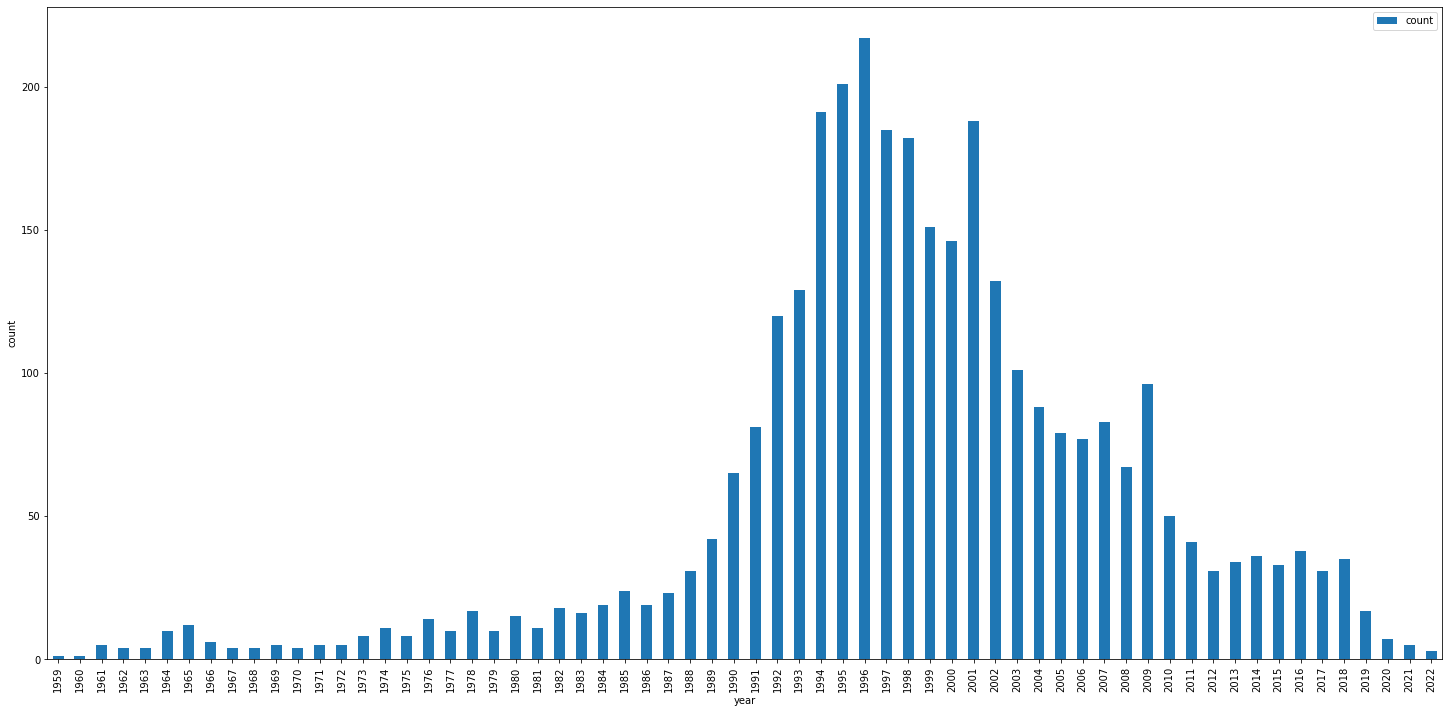

In [12]:
# now plot the signed date
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

meta_data_df['date_signed'] = pd.to_datetime(meta_data_df['date_signed'])

# create a representation of the month with strfmt
meta_data_df['year_of_date_signed'] = meta_data_df['date_signed'].map(lambda dt: dt.strftime('%Y'))

grouped_df = meta_data_df.groupby('year_of_date_signed').size().to_frame("count").reset_index()
grouped_df.plot(kind='bar', x='year_of_date_signed', y='count', figsize=(25,12), xlabel = 'year', ylabel = 'count')